In [2]:
import pandas as pd
import matplotlib.pyplot as plt

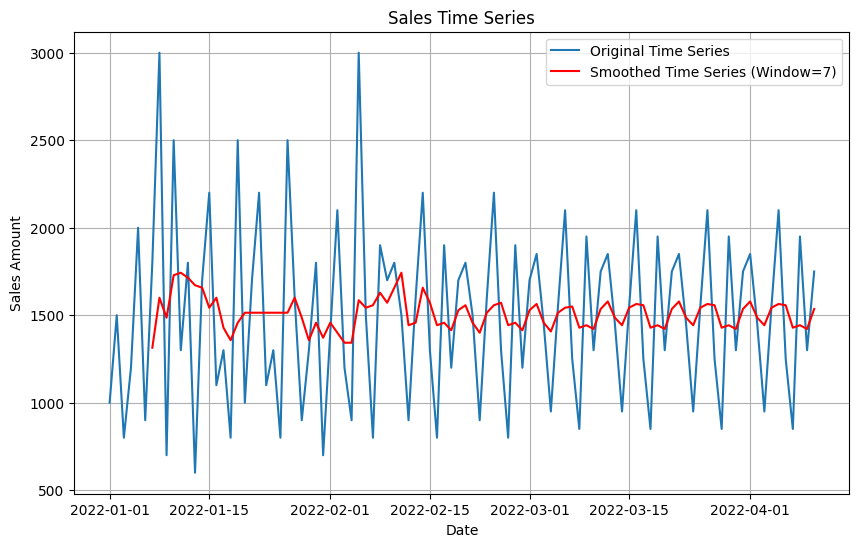

In [4]:
sales_df = pd.read_csv('sales.csv')
sales_df['date'] = pd.to_datetime(sales_df['date'],format='%d-%m-%Y')

# Group by date and sum the sales amount for each day
time_series_data = sales_df.groupby('date')['sales_amount'].sum()

# Fill missing dates with 0 sales
start_date = sales_df['date'].min()
end_date = sales_df['date'].max()
all_dates = pd.date_range(start=start_date, end=end_date, freq='D')
time_series_data = time_series_data.reindex(all_dates, fill_value=0)

# Smooth the time series using Simple Moving Average (SMA)
window_size = 7  # Adjust window size as needed
smoothed_data = time_series_data.rolling(window=window_size).mean()

# Visualize original and smoothed time series
plt.figure(figsize=(10, 6))
plt.plot(time_series_data.index, time_series_data.values, label='Original Time Series')
plt.plot(time_series_data.index, smoothed_data, label=f'Smoothed Time Series (Window={window_size})', color='red')
plt.title('Sales Time Series')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.legend()
plt.grid(True)
plt.show()